In [1]:
########################################################################
# This notebook demonstrates weight Prunnig                            #
# Framework used is tensorflow                                         #
########################################################################

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from time import perf_counter 
import os

In [4]:
## Defining batch specfications
batch_size = 100
img_height = 250
img_width = 250

In [5]:
## loading training set
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

NotFoundError: Could not find directory /kaggle/input/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train

In [5]:
training_ds

<BatchDataset shapes: ((None, 250, 250, 3), (None,)), types: (tf.float32, tf.int32)>

In [6]:
## loading validation dataset
validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 17572 files belonging to 38 classes.


In [7]:
class_names = training_ds.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [8]:
## Defining Cnn
MyCnn = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(len(class_names), activation= 'softmax')
])


In [9]:
MyCnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
## train our CNN v = 5
retVal = MyCnn.fit(training_ds,validation_data= validation_ds,epochs = 5)

Epoch 1/5
703/703 [==============================] - 890s 1s/step - loss: 0.8166 - accuracy: 0.7653 - val_loss: 0.3437 - val_accuracy: 0.8912
Epoch 2/5
703/703 [==============================] - 466s 663ms/step - loss: 0.1982 - accuracy: 0.9351 - val_loss: 0.2256 - val_accuracy: 0.9307
Epoch 3/5
703/703 [==============================] - 466s 663ms/step - loss: 0.1027 - accuracy: 0.9665 - val_loss: 0.2188 - val_accuracy: 0.9351
Epoch 4/5
703/703 [==============================] - 467s 664ms/step - loss: 0.0747 - accuracy: 0.9753 - val_loss: 0.2506 - val_accuracy: 0.9315
Epoch 5/5
703/703 [==============================] - 469s 667ms/step - loss: 0.0532 - accuracy: 0.9823 - val_loss: 0.2464 - val_accuracy: 0.9365


In [11]:
retVal.history['accuracy']

[0.7652891278266907,
 0.9351447224617004,
 0.9665125608444214,
 0.975261390209198,
 0.9823173880577087]

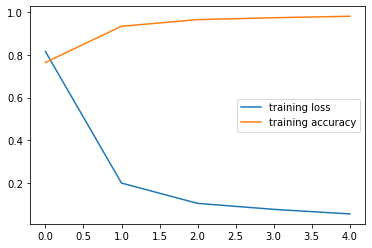

In [12]:
plt.plot(retVal.history['loss'], label = 'training loss')
plt.plot(retVal.history['accuracy'], label = 'training accuracy')
plt.legend()

In [13]:
validation_ds.take(1)

<TakeDataset shapes: ((None, 250, 250, 3), (None,)), types: (tf.float32, tf.int32)>

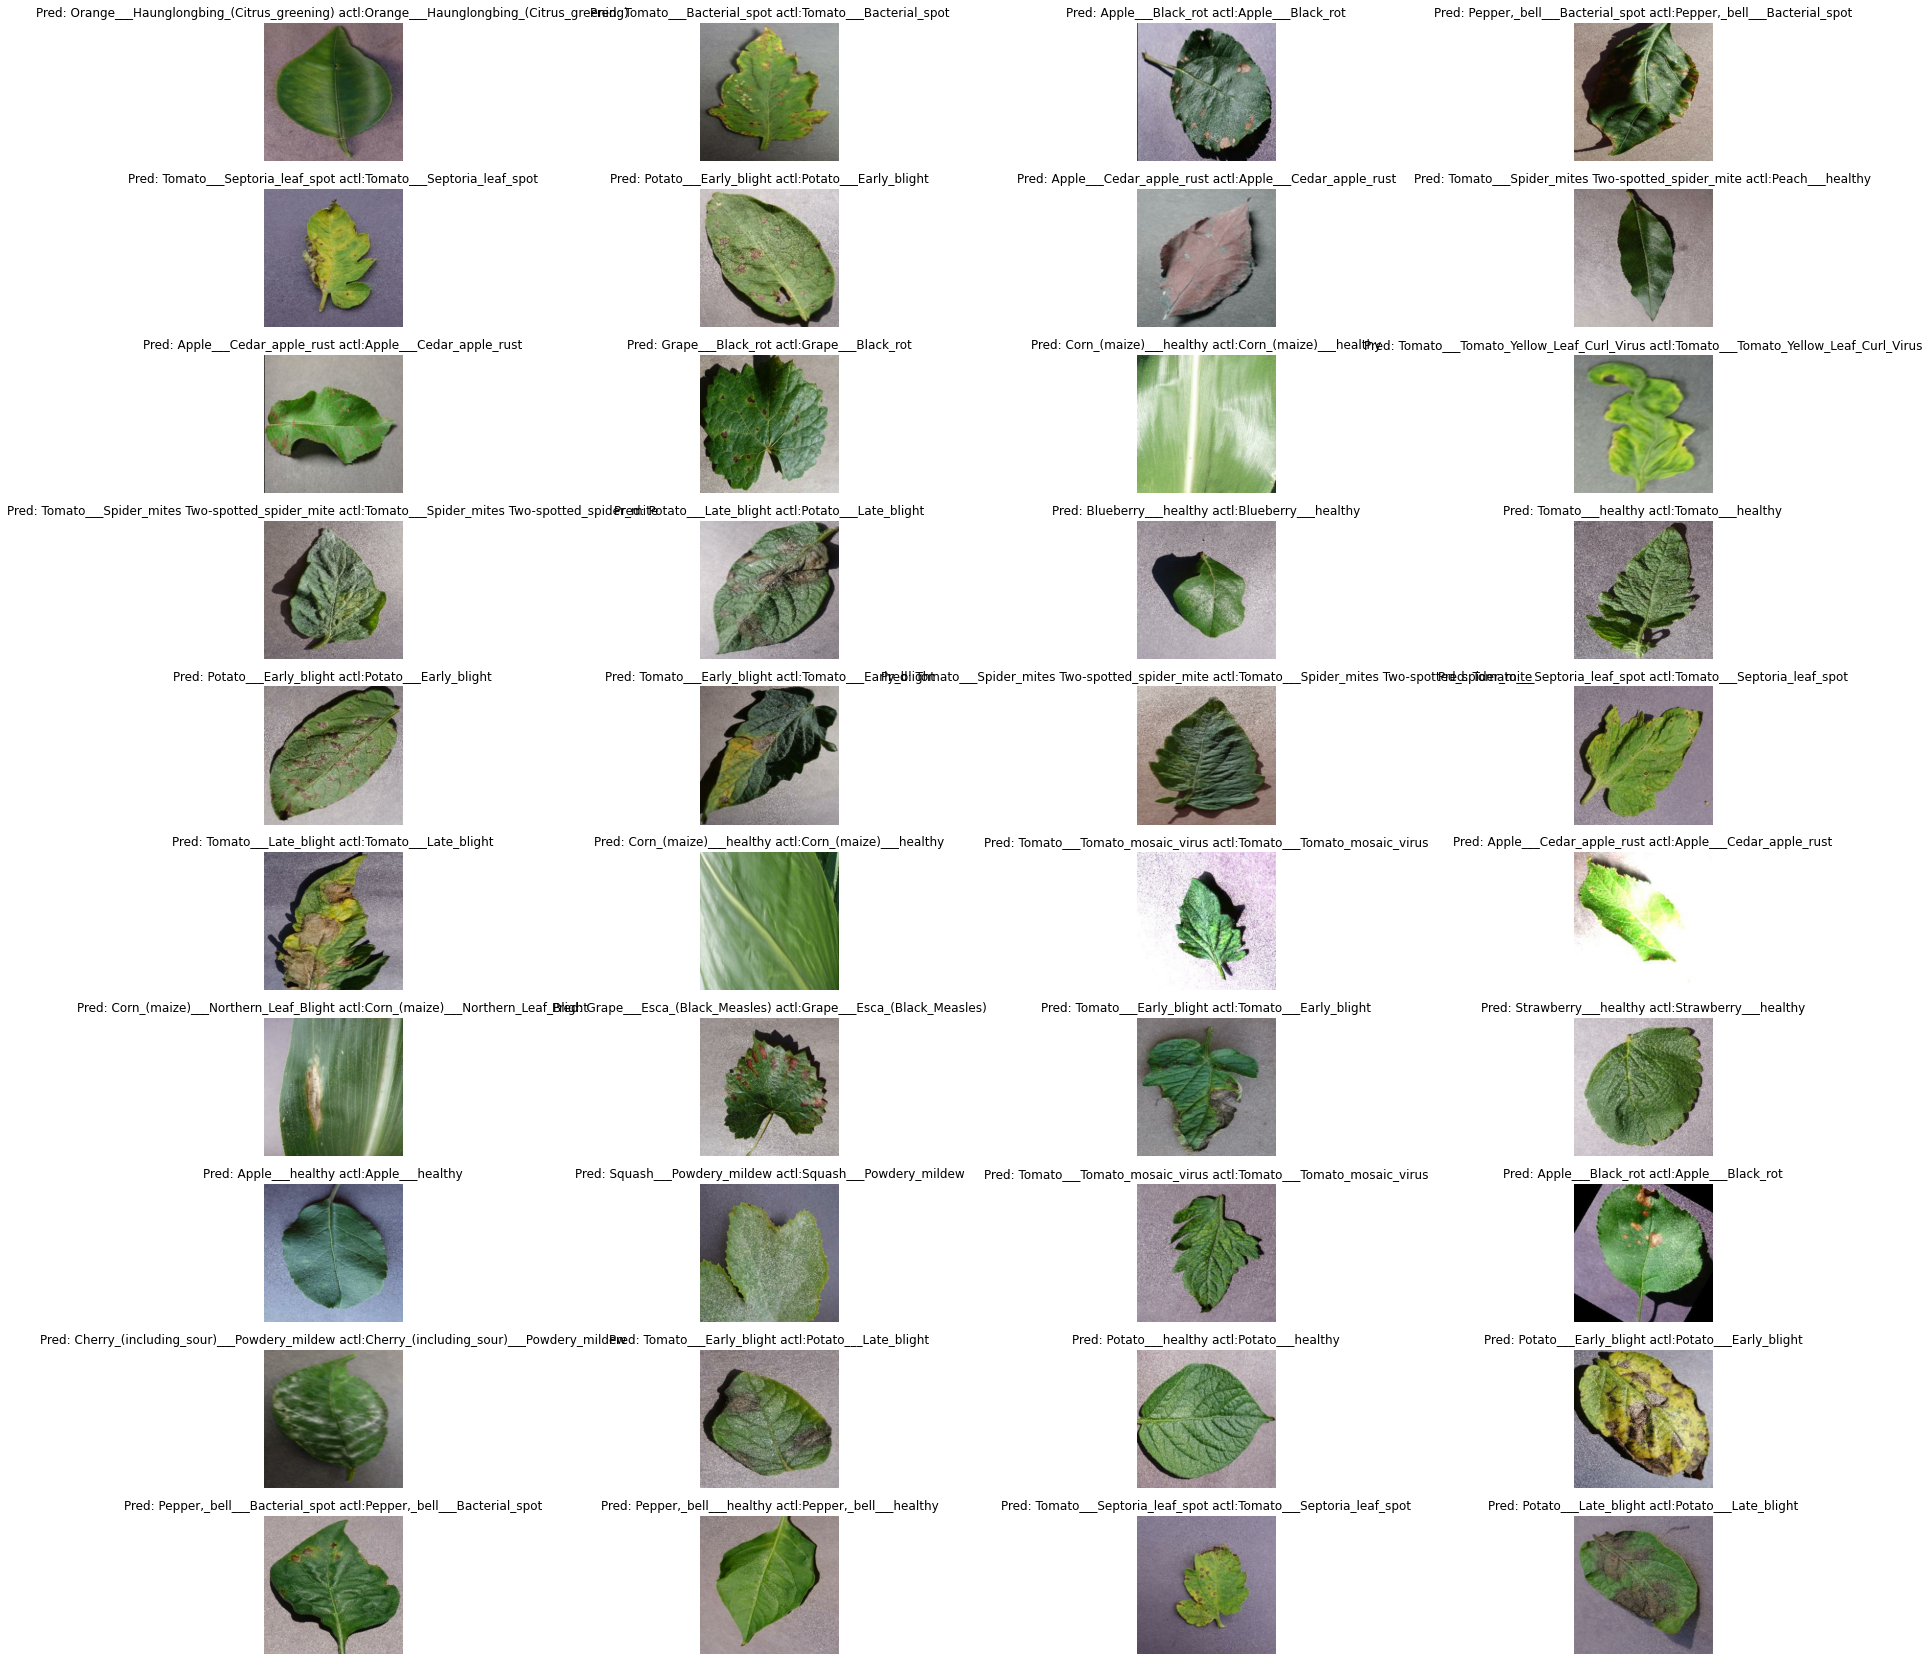

In [14]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in validation_ds.take(1):
    predictions = MyCnn.predict(images)
    predlabel = []
    prdlbl = []
    
#     print(images)
#     print("------"*3)
#     print(predictions)
#     break
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
        
#         print(predlabel)
#         print("------"*3)
#         print(prdlbl)
#         break
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)
    break

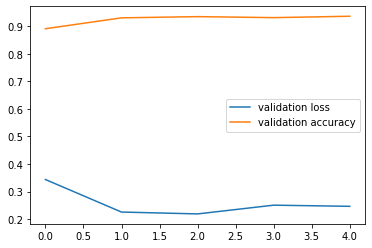

In [15]:
plt.plot(retVal.history['val_loss'], label = 'validation loss')
plt.plot(retVal.history['val_accuracy'], label = 'validation accuracy')
plt.legend()

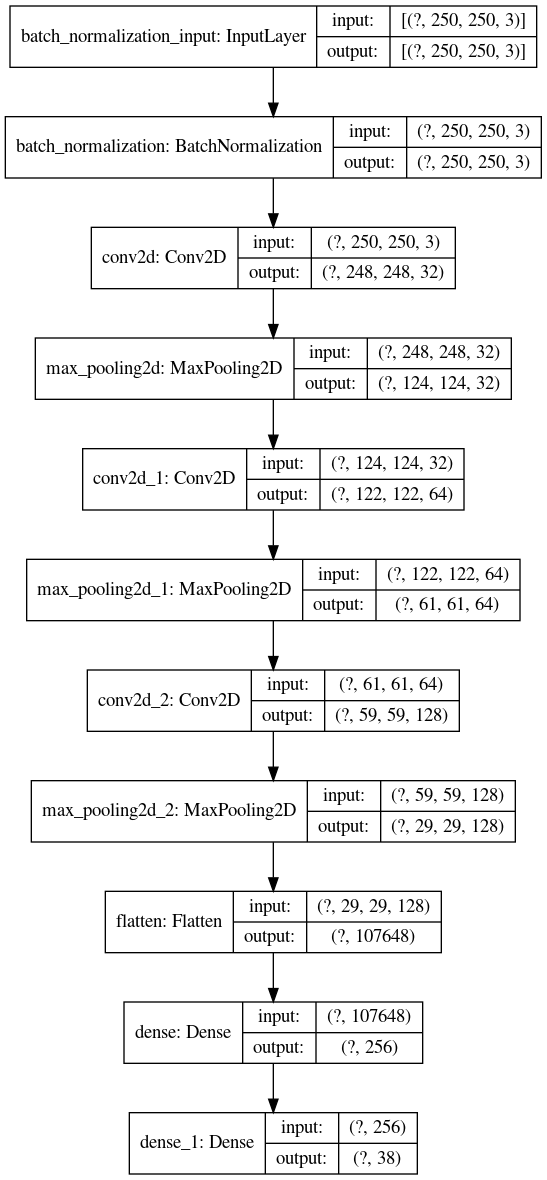

In [16]:
from keras.utils.vis_utils import plot_model
plot_model(MyCnn, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [17]:
MyCnn.save('model.h5')

In [18]:
#####################################################################
# lets now see time taken and validation accuracy and model size    #
#####################################################################
start = perf_counter() 
_, unPrunnedAccuracy = MyCnn.evaluate(validation_ds, verbose = 0 )
end = perf_counter() 

sizeUnprunned = os.path.getsize('model.h5')
# let convert to MB
sizeUnprunned = sizeUnprunned / (1024 * 1024)

print ('unPrunned model Summary:')
print('Model size(MB) : {}'.format(sizeUnprunned))
print('Time on Validation data (sec) : {}'.format(end - start))
print('Accuracy on validation data: {}'.format(unPrunnedAccuracy))

unPrunned model Summary:
Model size(MB) : 316.61851501464844
Time on Validation data (sec) : 62.85511948099975
Accuracy on validation data: 0.936546802520752


In [19]:
/opt/conda/bin/python3.7 -m pip install --upgrade pip

SyntaxError: invalid syntax (<ipython-input-19-cb798f4bf57e>, line 1)

In [ ]:
!pip install -q tensorflow-model-optimization

In [ ]:
########################################################################
# lets now implement weight prunning                                   #
########################################################################
import tensorflow_model_optimization as tfmot
prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

epochs = 5
end_step = np.ceil(70295 / batch_size).astype(np.int32) * epochs
## pruning param
pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.50, final_sparsity=0.80, begin_step=0, end_step=end_step)
                }
## defining prunned model
MyPrunnedModel = prune_low_magnitude(MyCnn, **pruning_params)
MyPrunnedModel.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep(),
  tfmot.sparsity.keras.PruningSummaries(log_dir='.'),
]
retVal = MyPrunnedModel.fit(training_ds,validation_data= validation_ds,epochs = 5 ,callbacks= callbacks)

In [ ]:
#################################################################
# let Benmark this as above                                     #
#################################################################
plt.plot(retVal.history['val_loss'], label = 'validation loss')
plt.plot(retVal.history['val_accuracy'], label = 'validation accuracy')
plt.legend()


In [ ]:
plt.plot(retVal.history['loss'], label = 'training loss')
plt.plot(retVal.history['accuracy'], label = 'training accuracy')
plt.legend()

In [ ]:
MyPrunnedModel.save('Prunnedmodel.h5')

In [ ]:
start = perf_counter() 
_, PrunnedAccuracy = MyPrunnedModel.evaluate(validation_ds, verbose = 0 )
end = perf_counter() 

sizePrunned = os.path.getsize('Prunnedmodel.h5')
# let convert to MB
sizePrunned = sizePrunned / (1024 * 1024)

print ('Prunned model Summary:')
print('Model size(MB) : {}'.format(sizePrunned))
print('Time on Validation data (sec) : {}'.format(end - start))
print('Accuracy on validation data: {}'.format(PrunnedAccuracy))

In [ ]:
##########################################################
# Concluding Remarks:                                    #
##########################################################
#  reduction in size = ~ 30 %                            #
#  speedup of validation data = ~ 22.7 %                 #
#  accuracy increased by 1 %                             #
##########################################################

In [5]:
tf.__version__

'2.14.0'